In [1]:
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading/importing the Data

In [4]:
df=pd.read_csv('twitter_training.csv')
df

Id     Location Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                  Review  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [5]:
df['Review'].isna().sum()

686

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Id           0
Location     0
Sentiment    0
Review       0
dtype: int64

## Normalization / Tokenization/ Stopwords /Lemmatization

In [9]:
from nltk.stem import WordNetLemmatizer
import re

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

q = []

for i in df.Review:
    j = i.lower()  # Convert to lowercase
    r = re.sub("[^a-z0-9 ]", "", j)  # Remove special characters
    t = word_tokenize(r)  # Tokenize text
    
    processed_words = [lemmatizer.lemmatize(word) for word in t if word not in stop_words]
    jn=' '.join(processed_words)
    q.append(jn)  



In [10]:
q

['im getting borderland murder',
 'coming border kill',
 'im getting borderland kill',
 'im coming borderland murder',
 'im getting borderland 2 murder',
 'im getting borderland murder',
 'spent hour making something fun dont know huge borderland fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsi5wf9jg',
 'spent couple hour something fun dont know im huge borderland fan maya one favorite character decided make wallpaper pc here original picture compared creation made fun pictwittercom mlsi5wf9jg',
 'spent hour something fun dont know im huge borderland fan maya one favorite character',
 'spent hour making something fun dont know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsi5wf9jg',
 '2010 spent hour making something fun dont know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation ma

In [11]:
q[:10]

['im getting borderland murder',
 'coming border kill',
 'im getting borderland kill',
 'im coming borderland murder',
 'im getting borderland 2 murder',
 'im getting borderland murder',
 'spent hour making something fun dont know huge borderland fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsi5wf9jg',
 'spent couple hour something fun dont know im huge borderland fan maya one favorite character decided make wallpaper pc here original picture compared creation made fun pictwittercom mlsi5wf9jg',
 'spent hour something fun dont know im huge borderland fan maya one favorite character',
 'spent hour making something fun dont know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsi5wf9jg']

## TF-IDF 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfv=TfidfVectorizer(max_features=1000)
data=tfv.fit_transform(q).toarray()

In [14]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
cols=tfv.get_feature_names_out()
cols

array(['10', '100', '11', '12', '15', '16', '19', '20', '2019', '2020',
       '2077', '21', '24', '2k', '30', '3080', '50', '60', '90', 'able',
       'absolute', 'absolutely', 'access', 'account', 'achievement',
       'action', 'activision', 'actual', 'actually', 'ad', 'add', 'added',
       'age', 'ago', 'ai', 'aint', 'air', 'almost', 'alone', 'along',
       'already', 'also', 'always', 'amazing', 'amazon', 'amd', 'america',
       'american', 'amount', 'angry', 'announce', 'annoying', 'another',
       'anymore', 'anyone', 'anything', 'anyway', 'apex', 'app',
       'apparently', 'apple', 'appreciate', 'apps', 'arent', 'around',
       'art', 'article', 'artist', 'as', 'assassin', 'attack', 'auto',
       'available', 'award', 'away', 'awesome', 'baby', 'back', 'bad',
       'ball', 'ban', 'banned', 'based', 'basically', 'battle',
       'battlefield', 'bc', 'beat', 'beautiful', 'become', 'behind',
       'believe', 'beluba', 'best', 'beta', 'better', 'beyond',
       'bf4dbcom',

## Splitting 

In [17]:
x=data
y=df.Sentiment.values

In [18]:

y = pd.Series(y)

mapping = {"Positive": 1, "Neutral": 0, "Negative": 2,"Irrelevant":3}

y = y.map(mapping)

y = y.dropna()
y = y.astype(int)

# Convert to NumPy array
y = y.to_numpy()


In [19]:
y.astype(int)

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
x.shape

(73996, 1000)

In [22]:
y[0:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [23]:
min_samples = min(len(x), len(y))
x = x[:min_samples]
y = y[:min_samples]
# x.shape
y.shape

(73996,)

## Building Neural Network

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True )
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nn = Sequential()
nn.add(Dense(1000, input_dim=1000, activation='relu'))  
nn.add(Dense(1000, activation='relu'))  
nn.add(Dropout(0.1))
nn.add(Dense(4, activation='softmax'))  

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
model=nn.fit(x,y,validation_split=0.20,epochs=50)

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.5712 - loss: 1.0096 - val_accuracy: 0.4722 - val_loss: 1.5530
Epoch 2/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8681 - loss: 0.3336 - val_accuracy: 0.4418 - val_loss: 2.0661
Epoch 3/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9111 - loss: 0.2100 - val_accuracy: 0.4501 - val_loss: 2.6614
Epoch 4/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9211 - loss: 0.1760 - val_accuracy: 0.4370 - val_loss: 3.0869
Epoch 5/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9235 - loss: 0.1691 - val_accuracy: 0.4424 - val_loss: 3.6156
Epoch 6/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9246 - loss: 0.1625 - val_accuracy: 0.4606 - val_loss: 3.3892
Epoch 7/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9258 - loss: 0.1592 - val_accuracy: 0.4600 - val_loss: 3.7667
Epoch 8/50
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9275 -

In [26]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

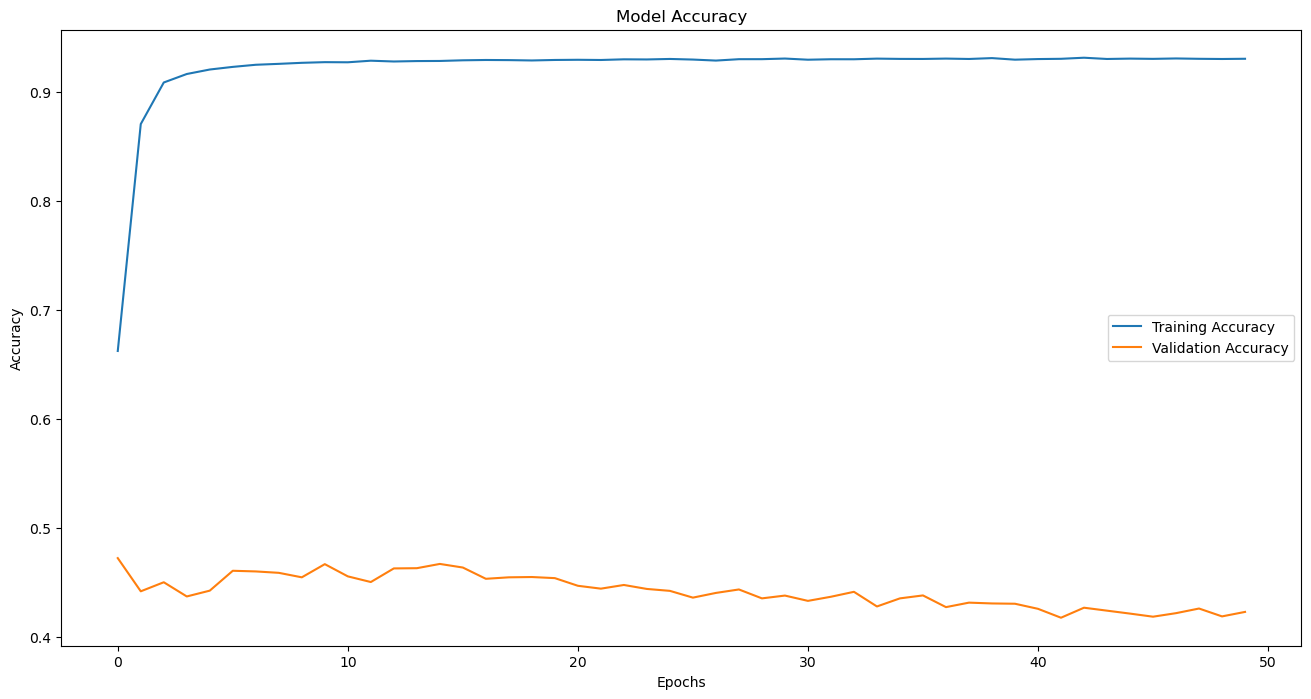

In [27]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(16, 8))

# Plot accuracy
plt.plot(model.history['accuracy'], label='Training Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [28]:
x.shape

(73996, 1000)

In [29]:
y.shape

(73996,)

## Importing the twitter validation dataset and naming the columns

In [31]:
df2=pd.read_csv('twitter_validation.csv',names=['Id','Company','Sentiment','Review'])

In [32]:
df2

Id              Company   Sentiment  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                                Review  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]

## Checking for null values

In [34]:
df2.isna().sum()

Id           0
Company      0
Sentiment    0
Review       0
dtype: int64

In [35]:
df2['Sentiment'].value_counts()

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

## Normalization / Tokenization/ Stopwords /Lemmatization

In [37]:
R = []

for i in df2.Review:
    j = i.lower()  
    r = re.sub("[^a-z0-9 ]", "", j)  
    t = word_tokenize(r)  # Tokenize text
    
    processed_words = [lemmatizer.lemmatize(word) for word in t if word not in stop_words]
    jn=' '.join(processed_words)
    R.append(jn)  

In [38]:
R

['mentioned facebook struggling motivation go run day translated tom great auntie hayley cant get bed told grandma think im lazy terrible person',
 'bbc news amazon bos jeff bezos reject claim company acted like drug dealer bbccouknewsavbusine',
 'microsoft pay word function poorly samsungus chromebook',
 'csgo matchmaking full closet hacking truly awful game',
 'president slapping american face really commit unlawful act acquittal discover google vanityfaircomnews202002t',
 'hi eahelp ive madeleine mccann cellar past 13 year little sneaky thing escaped whilst loading fifa point took card im use paypal account isnt working help resolve please',
 'thank eamaddennfl new te austin hooper orange brown brown austinhooper18 pictwittercomgrg4xzfkon',
 'rocket league sea thief rainbow six siege love playing three stream best stream twitch rocketleague seaofthieves rainbowsixsiege follow',
 'as still kneedeep assassin creed odyssey way anytime soon lmao',
 'fix jesus please fix world going play

## TF-IDF

In [40]:
data_pred =tfv.transform(R).toarray()

In [41]:
data_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
nn.predict(data_pred)[0:10]

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[1.2777700e-32, 1.8391628e-22, 6.1951341e-24, 1.0000000e+00],
       [1.0000000e+00, 8.6870865e-17, 6.9316584e-17, 1.6625902e-16],
       [9.5756649e-13, 9.9744421e-11, 1.0000000e+00, 4.3483741e-09],
       [4.6920040e-16, 7.0880884e-12, 1.0000000e+00, 4.2812167e-11],
       [1.0000000e+00, 1.8881309e-12, 5.1499168e-08, 5.6098747e-17],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.5924710e-01, 3.9921173e-01, 1.9541180e-01, 2.4612941e-01],
       [2.3086314e-30, 1.0000000e+00, 5.0729664e-35, 4.3906255e-18],
       [1.8984227e-27, 1.0000000e+00, 4.3405555e-15, 2.7503740e-17],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [43]:
import numpy as np

predicted_classes = np.argmax(nn.predict(data_pred), axis=1)
print(predicted_classes[:16])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[3 0 2 2 0 2 1 1 1 2 1 1 2 0 2 1]


In [44]:
df2['predicted_output']=predicted_classes

In [45]:
df2

Id              Company   Sentiment  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                                Review  predicted_output  
0    I mentioned on Facebook that I was struggling ...                 3  
1    BBC News - Amazon boss Jeff Bezos rejects clai...                 0  
2    @Microsoft Why do I pay for WORD when it funct...                 2  
3    CSGO matchmaking is so full of closet hacking,...                 2  
4    Now the President is slapping Americans in the...                 0  
..                                                 ...               ...  
995  ⭐️ Toronto is the arts and culture capital of ...                 2  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...                 3  
997  Today sucked so it’s time to drink wine n play...                 1  
998  Bought a fraction of Microsoft today. Small wins.                 1  
999  Johnson & Johnson to stop selling talc baby po...                 1  

[1000 rows x 5 columns]

### Neutral=0,Positive=1,Negative=2,Irrelevant=3

In [47]:
df2.to_csv("predicted.csv")